# CS 210 - Course PROJECT
# Onur VAROL

# Instagram Liked Posts Analysis
## Mehmet Serdar ÖZCAN - 26994


In [18]:
import warnings
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
warnings.filterwarnings("ignore")

# Reading the HTML file
with open("liked_posts.html", "r", encoding="utf-8") as file:
    content = file.read()

# Analyzing the HTML content using BeautifulSoup
soup = BeautifulSoup(content, "html.parser")

# Creating an empty list for the DataFrame
data = []

# Selecting the section where liked posts are located
liked_posts_section = soup.select("div.pam._3-95._2ph-._a6-g.uiBoxWhite.noborder")

# Looping through each liked post
for liked_post in liked_posts_section:
    # Select the username
    username = liked_post.select_one("div._3-95._2pim._a6-h._a6-i").text

    # Select the date information of the liked post
    date_info = liked_post.select_one("div._a6-p > div > div:nth-child(2)").text

    # Create a dictionary inside the list and add the data
    data.append({"Username": username, "Date Info": date_info})

# Creating a DataFrame
df = pd.DataFrame(data)

# Printing the DataFrame to the screen
df

,Username,Date Info
0,ilaydatayfunn,"Jan 1, 2024, 5:07 PM"
1,selinnaifoglu,"Dec 31, 2023, 3:33 AM"
2,selinnaifoglu,"Dec 31, 2023, 2:02 AM"
3,cdhayati,"Dec 30, 2023, 3:35 PM"
4,emrezeytinoglu,"Dec 30, 2023, 12:11 PM"
...,...,...
1200,cdhayati,"Jan 1, 2021, 1:29 PM"
1201,cdhayati,"Jan 1, 2021, 1:29 PM"
1202,cdhayati,"Jan 1, 2021, 1:29 PM"
1203,mugeyenguner,"Jan 1, 2021, 10:44 AM"


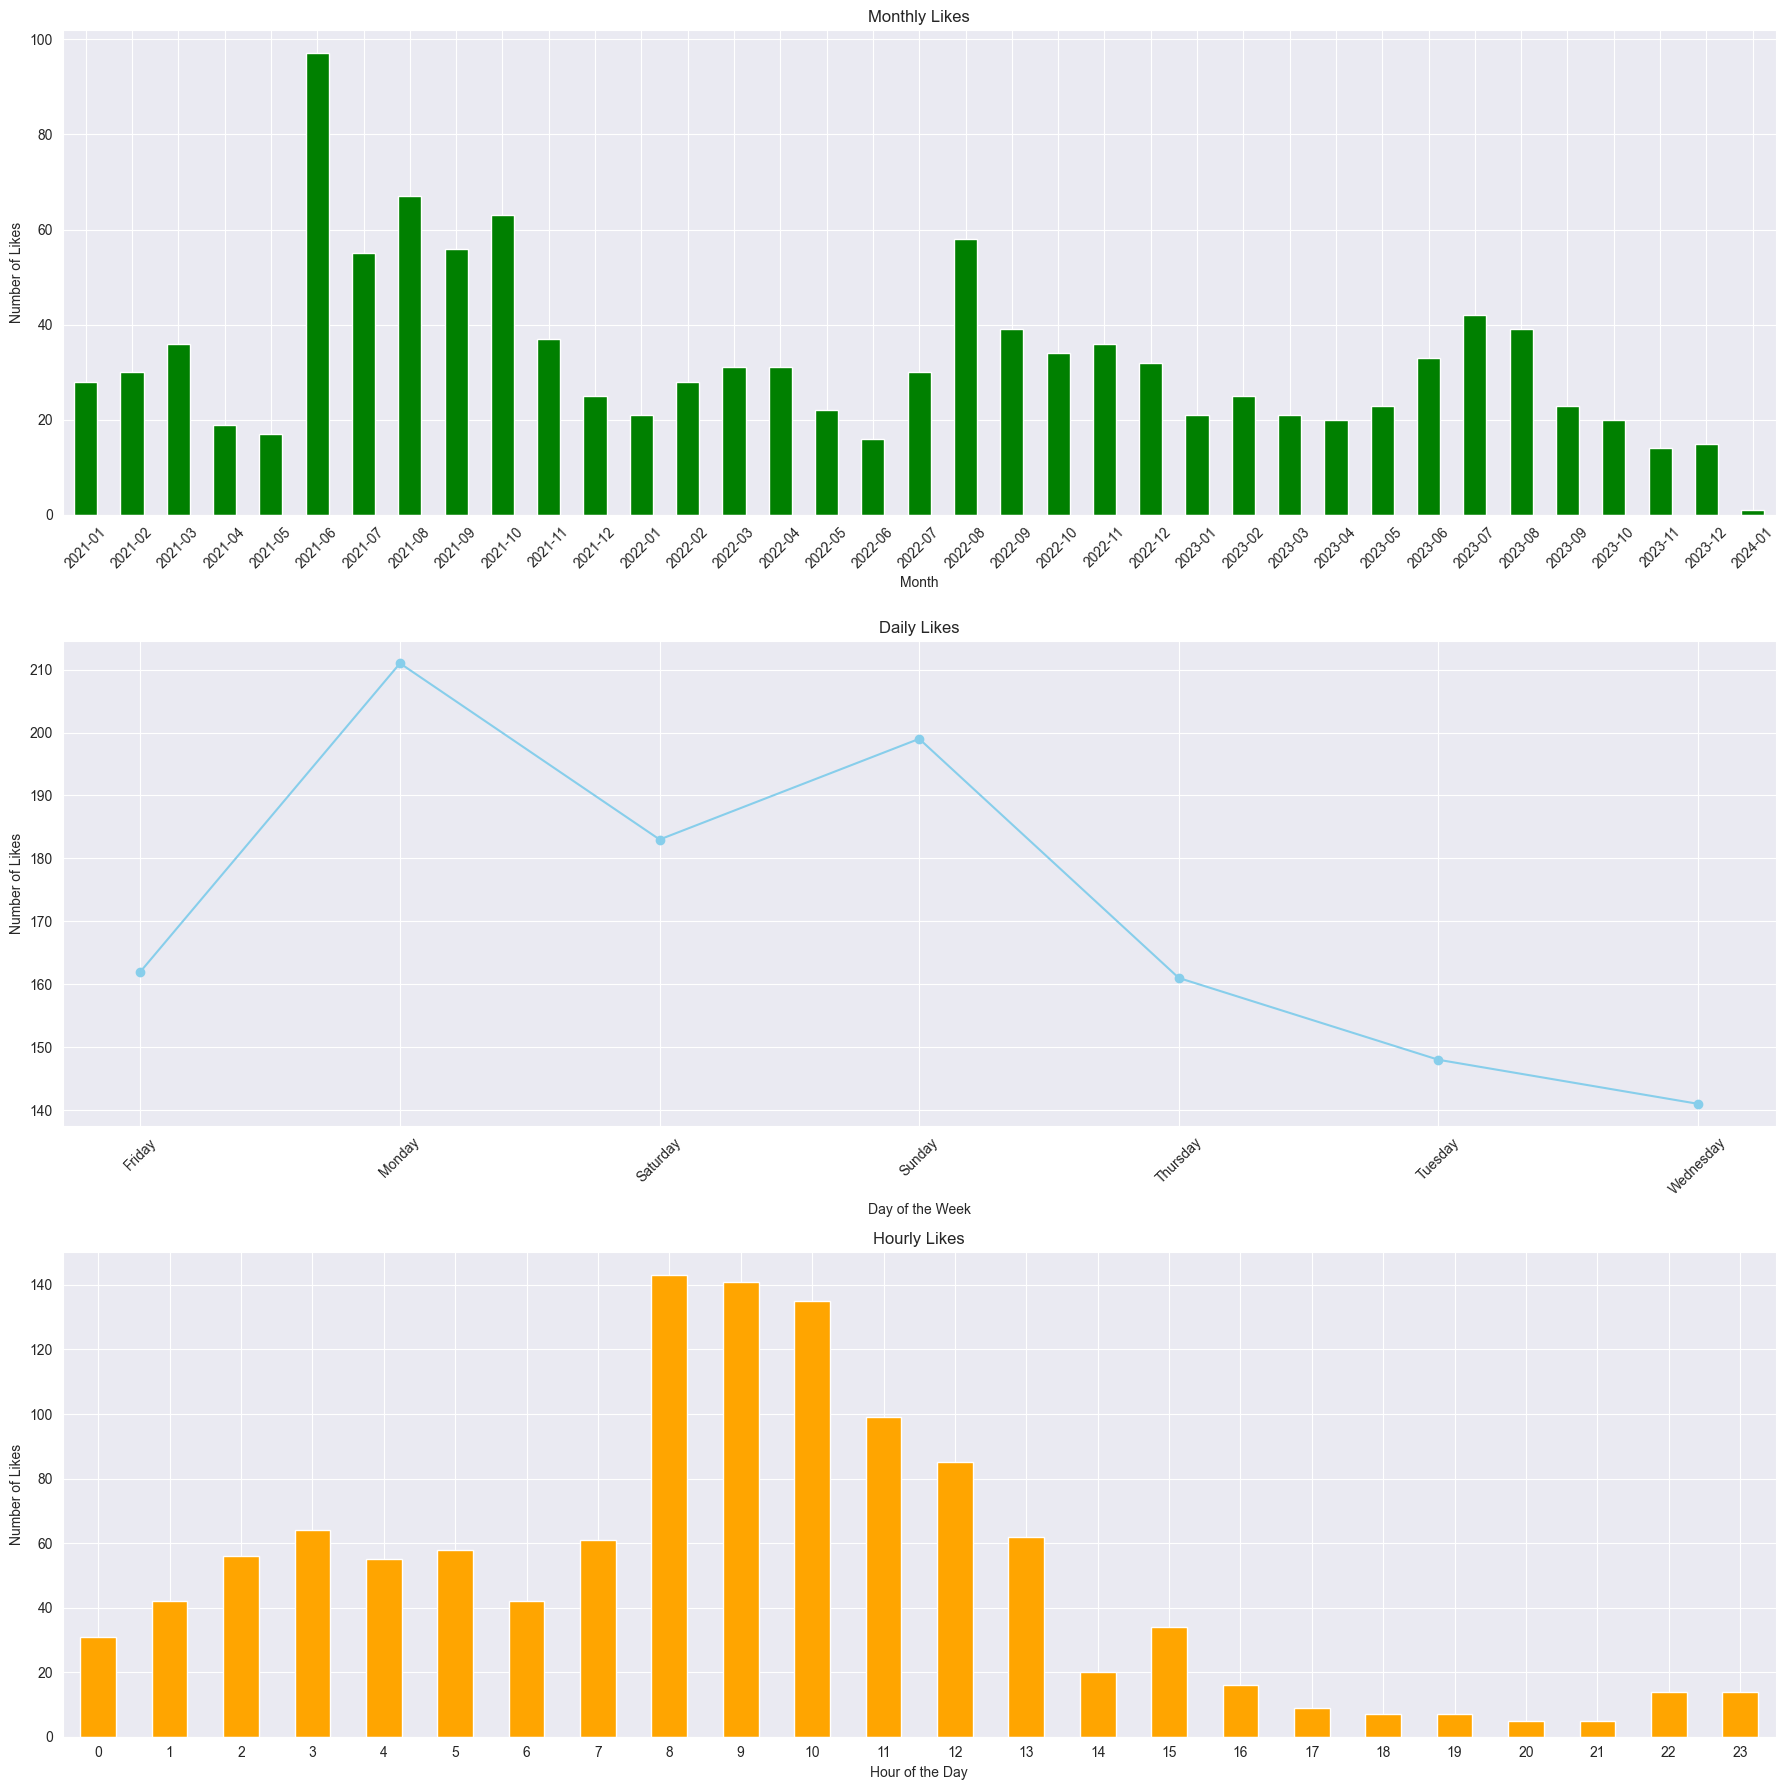

,Username,Date Info,Month,Day,Hour
0,ilaydatayfunn,2024-01-01 17:07:00,2024-01,Monday,17
1,selinnaifoglu,2023-12-31 03:33:00,2023-12,Sunday,3
2,selinnaifoglu,2023-12-31 02:02:00,2023-12,Sunday,2
3,cdhayati,2023-12-30 15:35:00,2023-12,Saturday,15
4,emrezeytinoglu,2023-12-30 12:11:00,2023-12,Saturday,12
...,...,...,...,...,...
1200,cdhayati,2021-01-01 13:29:00,2021-01,Friday,13
1201,cdhayati,2021-01-01 13:29:00,2021-01,Friday,13
1202,cdhayati,2021-01-01 13:29:00,2021-01,Friday,13
1203,mugeyenguner,2021-01-01 10:44:00,2021-01,Friday,10


In [19]:
import matplotlib.pyplot as plt

# Converting date information to pandas datetime format
df['Date Info'] = pd.to_datetime(df['Date Info'], format='%b %d, %Y, %I:%M %p')

# Extracting month, day, and hour information
df['Month'] = df['Date Info'].dt.to_period('M')
df['Day'] = df['Date Info'].dt.day_name()
df['Hour'] = df['Date Info'].dt.hour

# Grouping by month, day, and hour
monthly_likes = df.groupby('Month').size()
daily_likes = df.groupby('Day').size()
hourly_likes = df.groupby('Hour').size()

# Visualizing monthly, daily, and hourly likes
plt.figure(figsize=(18, 18))

# Subplot for monthly likes
plt.subplot(3, 1, 1)
monthly_likes.plot(kind='bar', color='green')
plt.title('Monthly Likes')
plt.xlabel('Month')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45)
plt.grid(True)

# Subplot for daily likes
plt.subplot(3, 1, 2)
daily_likes.plot(kind='line', marker='o', color='skyblue')
plt.title('Daily Likes')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45)
plt.grid(True)

# Hourly likes line chart
plt.subplot(3, 1, 3)
hourly_likes.plot(kind='bar', color='orange')
plt.title('Hourly Likes')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Likes')
plt.xticks(rotation=0)
plt.grid(True)

plt.tight_layout()
plt.show()

# Final dataframe
df

- I displayed the total likes by month in each month of the year. I liked the most in June 2021.
- Divided into days, I found that I liked the most on Mondays.
- I saw that I liked the most between 8 and 10 in the morning.

<Figure size 1800x1200 with 0 Axes>

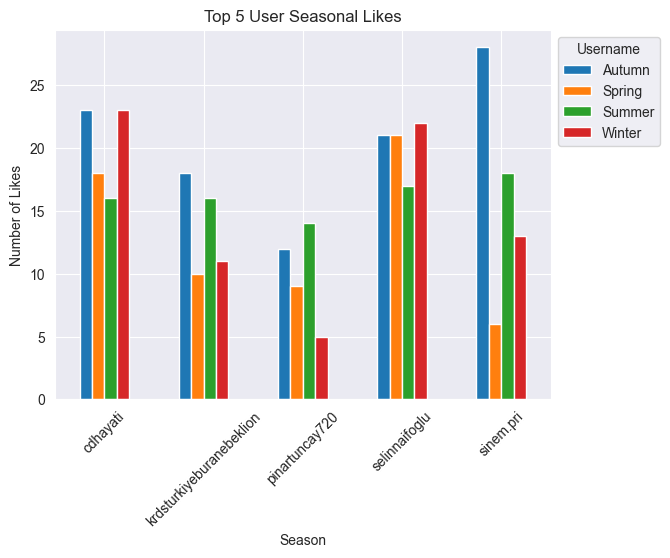

<Figure size 1800x1200 with 0 Axes>

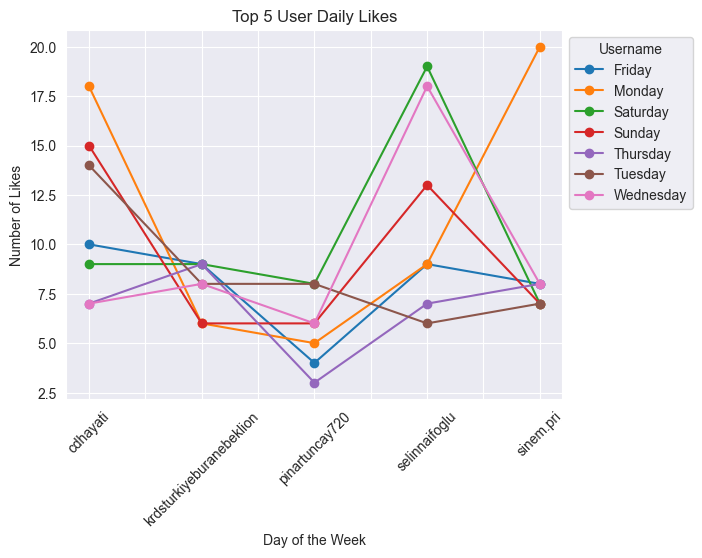

<Figure size 1800x1200 with 0 Axes>

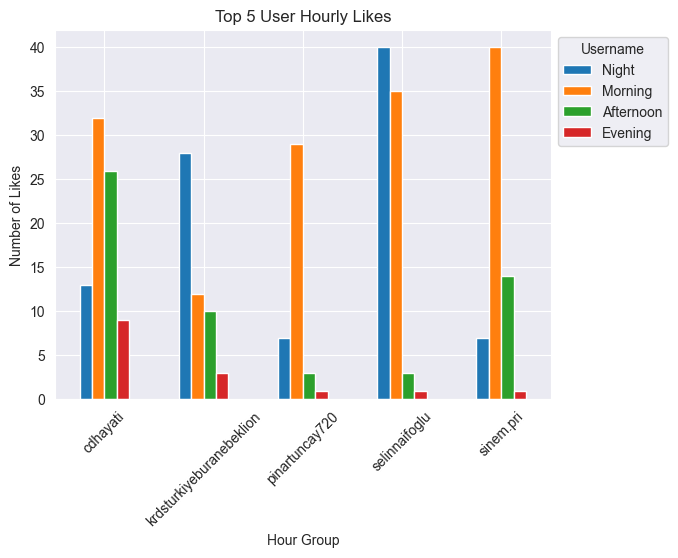

In [20]:
# Extracting hour, day, and season information
df['Hour'] = df['Date Info'].dt.hour
df['Day'] = df['Date Info'].dt.day_name()
df['Month'] = df['Date Info'].dt.month

# Mapping months to seasons
season_mapping = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
                  7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}

# Extracting hour, day, and season information
df['Hour'] = df['Date Info'].dt.hour
df['Day'] = df['Date Info'].dt.day_name()
df['Season'] = df['Month'].map(season_mapping)

# Finding the top 5 users with the most likes
top_users = df.groupby('Username').size().nlargest(5).index

# Filtering the DataFrame for the top 5 users
df_top_users = df[df['Username'].isin(top_users)]

# Grouping likes by usernames for season, day, and hour
df_top_users['Hour Group'] = pd.cut(df_top_users['Hour'], bins=[0, 6, 12, 18, 24],
                                    labels=['Night', 'Morning', 'Afternoon', 'Evening'])

user_seasonly_likes = df_top_users.groupby(['Username', 'Season'], observed=True).size().unstack(fill_value=0)
user_daily_likes = df_top_users.groupby(['Username', 'Day'], observed=True).size().unstack(fill_value=0)
user_hourly_likes = df_top_users.groupby(['Username', 'Hour Group'], observed=True).size().unstack(fill_value=0)

# User-based seasonal likes analysis
plt.figure(figsize=(18, 12))
user_seasonly_likes.plot(kind='bar')
plt.title('Top 5 User Seasonal Likes')
plt.xlabel('Season')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45)
plt.legend(title='Username', bbox_to_anchor=(1, 1))

# User-based daily likes analysis
plt.figure(figsize=(18, 12))
user_daily_likes.plot(kind='line', marker='o')
plt.title('Top 5 User Daily Likes')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45)
plt.legend(title='Username', bbox_to_anchor=(1, 1))

# User-based hourly likes analysis
plt.figure(figsize=(18, 12))
user_hourly_likes.plot(kind='bar')
plt.title('Top 5 User Hourly Likes')
plt.xlabel('Hour Group')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45)
plt.legend(title='Username', bbox_to_anchor=(1, 1))

plt.show()

- I displayed the distribution of likes for the photos of the 5 users whose posts I liked the most, according to seasons. Additionally, I displayed the distributions broken down by 7 days and hours of a day.


<Figure size 1200x600 with 0 Axes>

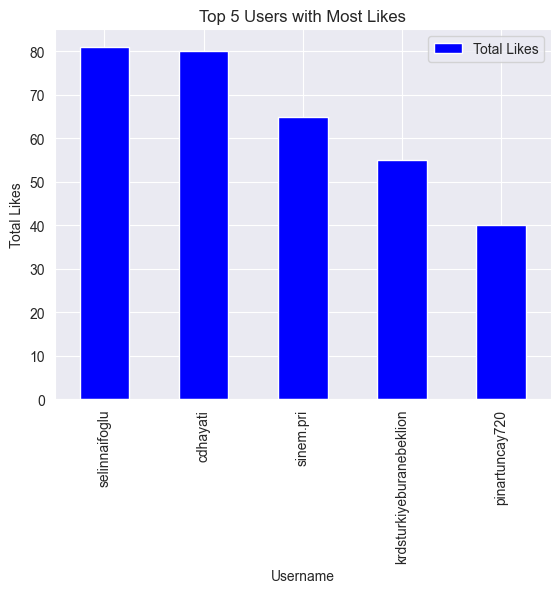

In [21]:
top_users = df.groupby('Username').size().reset_index(name='Total Likes')

# Sorting in descending order to get top users
top_users = top_users.sort_values(by='Total Likes', ascending=False)

# Visualizing the top users
plt.figure(figsize=(12, 6))
top_users.head(5).plot(x='Username', y='Total Likes', kind='bar', color='blue')
plt.title('Top 5 Users with Most Likes')
plt.xlabel('Username')
plt.ylabel('Total Likes')
plt.show()

- I displayed the total number of likes of the 5 users whose posts I liked most.

<Figure size 1200x600 with 0 Axes>

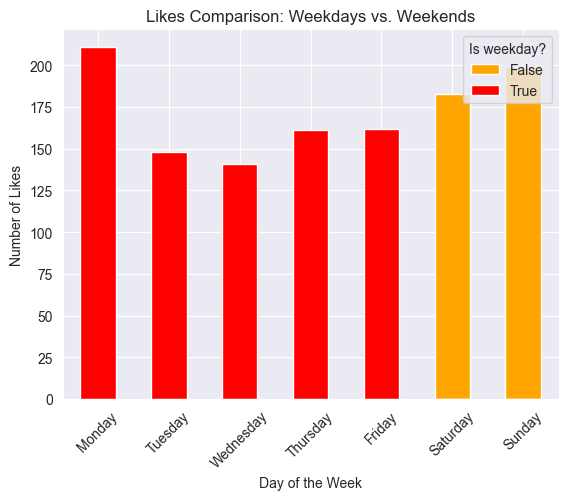

In [22]:
df['Day of Week'] = df['Date Info'].dt.day_name()
df['Weekday/Weekend'] = df['Date Info'].dt.dayofweek // 5 == 0

# Setting the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day of Week'] = pd.Categorical(df['Day of Week'], categories=day_order, ordered=True)

# Grouping by day of the week and weekday/weekend
likes_by_day = df.groupby(['Day of Week', 'Weekday/Weekend'], observed=True).size().unstack()

# Visualizing the likes by day
plt.figure(figsize=(12, 6))
likes_by_day.plot(kind='bar', color=['orange', 'red'], stacked=True)
plt.title('Likes Comparison: Weekdays vs. Weekends')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45)
plt.legend(title='Is weekday?', loc='upper right')
plt.show()

- I analyzed my total number of likes according to weekdays and weekends. I saw that there was more on weekend days and Monday than other days.


<Figure size 1500x800 with 0 Axes>

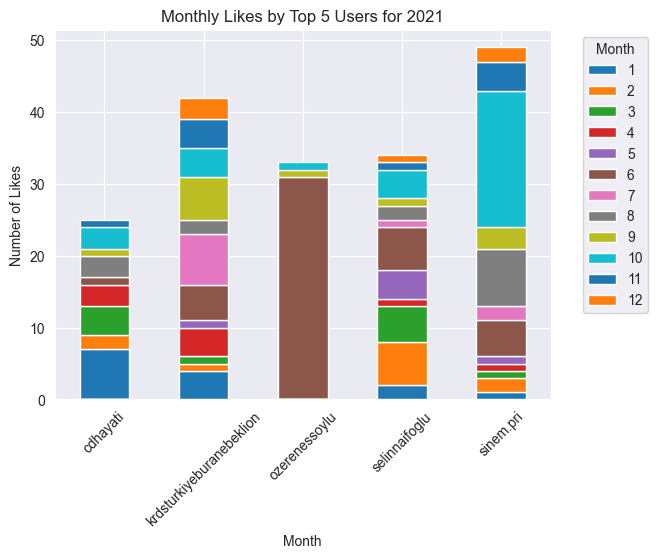

<Figure size 1500x800 with 0 Axes>

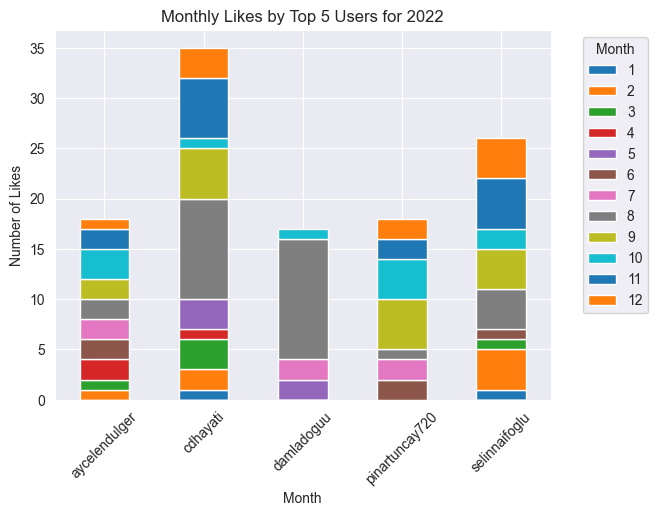

<Figure size 1500x800 with 0 Axes>

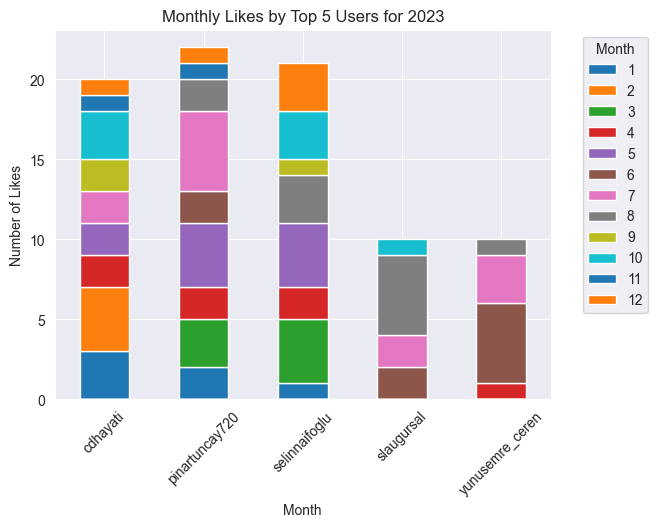

In [23]:
# List of years to analyze
years_to_analyze = [2021, 2022, 2023]  # Add more years if needed

for year in years_to_analyze:
    # Filtering data for the current year
    df_year = df[df['Date Info'].dt.year == year]

    # Getting the top 5 users for the current year
    top_users = df_year['Username'].value_counts().nlargest(5).index
    df_top_users = df_year[df_year['Username'].isin(top_users)]

    # Grouping by username and month for the current year
    likes_by_user_and_month_yearly = df_top_users.groupby(['Username', 'Month']).size().unstack().fillna(0)

    # Visualizing the likes by top 5 users for each month in the current year
    plt.figure(figsize=(15, 8))
    likes_by_user_and_month_yearly.plot(kind='bar', stacked=True)
    plt.title(f'Monthly Likes by Top 5 Users for {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Likes')
    plt.xticks(rotation=45)
    plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

- For each of the years 2021, 2022 and 2023, I displayed the 5 users whose posts I liked the most and in which month in that year I liked their posts more.


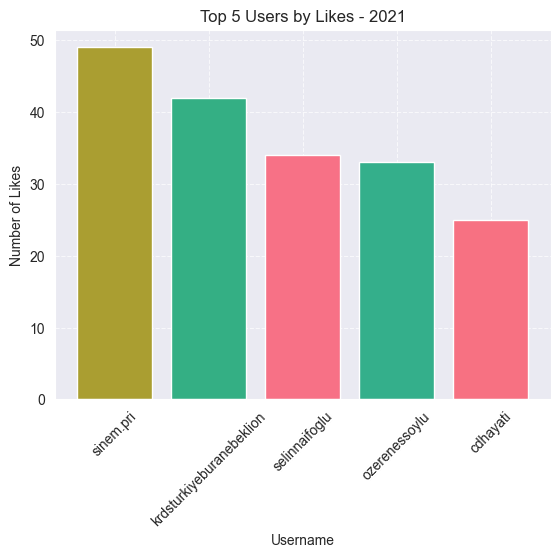

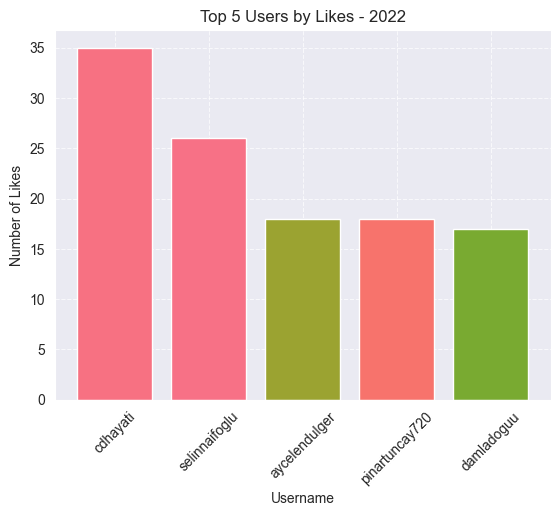

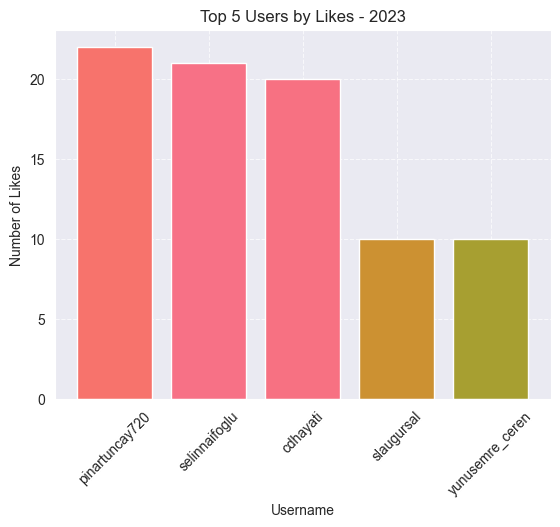

In [24]:
# Creating a dictionary to map usernames to unique colors
unique_colors = sns.color_palette("husl", n_colors=len(df['Username'].unique()))
username_color_map = dict(zip(df['Username'].unique(), unique_colors))

# List of years to analyze
years_to_analyze = [2021, 2022, 2023]

# Iterating over each year and plot the likes by usernames using assigned colors
for year in years_to_analyze:
    # Filtering data for the current year
    df_year = df[df['Date Info'].dt.year == year]

    # Grouping by username and count the likes
    likes_by_user = df_year['Username'].value_counts()

    # Using the colors assigned to usernames
    colors = [username_color_map[username] for username in likes_by_user.index]

    # Getting the top 5 users for the current year
    top5_users = likes_by_user.head(5)

    # Ploting the top 5 users with their assigned colors
    plt.bar(top5_users.index, top5_users, color=colors)
    plt.title(f'Top 5 Users by Likes - {year}')
    plt.xlabel('Username')
    plt.ylabel('Number of Likes')

    # Rotating x-axis labels
    plt.xticks(rotation=45)

    # Adding a grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Showing the plot
    plt.show()

- I identified the 5 users I liked the most, separately for these 3 years, according to those years.


In [25]:
# Extracting month and year information
df['Year'] = df['Date Info'].dt.year

# Calculating yearly average like counts
yearly_avg_likes = df.groupby('Year').size().mean()

# Calculating monthly average like counts
monthly_avg_likes = df.groupby('Month').size().mean()

# Calculating daily average like counts
daily_avg_likes = df.groupby('Date Info').size().mean()

print("Yearly Average Like Count:", yearly_avg_likes)
print("Monthly Average Like Counts:")
print(monthly_avg_likes)
print("Daily Average Like Count:", daily_avg_likes)

Yearly Average Like Count: 301.25
Monthly Average Like Counts:
100.41666666666667
Daily Average Like Count: 1.144349477682811


In [26]:
# Finding the total like counts for each user
likes_count_by_user = df.groupby('Username').size()

# Identifying the users with the least likes
least_liked_users = likes_count_by_user.nsmallest(
    20)
# For example, we are taking the first 20 users with the least likes
print("Users with the Least Likes:")
print(least_liked_users)

Users with the Least Likes:
Username
2400hourscsgo         1
_egeberk              1
_fitnessbyamee        1
adana0701             1
aesmeraldaa           1
ahmedbueida           1
ahmetgunes6           1
alperenoozkan         1
alpha_swole           1
angelin_a_michelle    1
aniloksuzzz           1
antidom               1
arda.curuk            1
aureus_amsterdam      1
bahadirpatir          1
batuhanyeni1          1
bbldenkesitler        1
berkebariscan         1
berkebaylan           1
beyondthebricktv      1
dtype: int64


In [27]:
# Sorting the DataFrame based on the 'Date Info' column in ascending order
df_sorted = df.sort_values(by='Date Info')

# Finding the oldest like date and total like count for each user
oldest_like_dates = df_sorted.groupby('Username')['Date Info'].min()
total_likes_by_user = df_sorted.groupby('Username').size()

# Selecting the least liked users
least_liked_users = total_likes_by_user.nsmallest(10)

# Getting the oldest like dates of these users
oldest_likes_of_least_liked = oldest_like_dates.loc[least_liked_users.index]

# Sorting the least liked users based on the oldest like date and total like count
result = pd.DataFrame({'Total Likes': total_likes_by_user, 'Oldest Like Date': oldest_likes_of_least_liked})
result_sorted = result.sort_values(by=['Total Likes', 'Oldest Like Date'])

# Displaying the results
print("Users with the Least Likes and Oldest Likes (Sorted):")
result_sorted.head(10)

Users with the Least Likes and Oldest Likes (Sorted):


,Total Likes,Oldest Like Date
Username,,
angelin_a_michelle,1,2021-03-17 03:16:00
ahmetgunes6,1,2021-04-11 10:10:00
adana0701,1,2021-09-09 08:22:00
alpha_swole,1,2021-10-28 01:23:00
_egeberk,1,2022-04-18 13:35:00
alperenoozkan,1,2022-04-19 04:40:00
_fitnessbyamee,1,2022-05-04 05:57:00
aesmeraldaa,1,2022-11-24 07:10:00
2400hourscsgo,1,2023-12-05 22:21:00


Mean Squared Error: 4.705951867219917
Train Score: 0.9961210972989045
Test Score: 0.9944540670772736


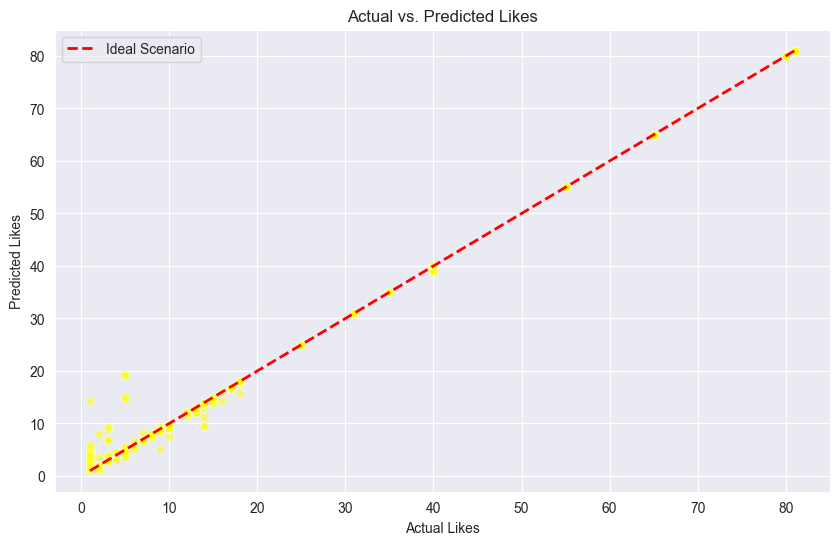

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Feature Engineering
df['Date Info'] = pd.to_datetime(df['Date Info'])
df['DayOfWeek'] = df['Date Info'].dt.dayofweek
df['HourOfDay'] = df['Date Info'].dt.hour

# Encode categorical features
label_encoder = LabelEncoder()
df['Username'] = label_encoder.fit_transform(df['Username'])
df['Likes'] = total_likes_by_user[df['Username']].values

# Defining features and target variable
features = ['Username', 'DayOfWeek', 'HourOfDay']
X = df[features]
y = df['Likes']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Train Score
train_score = model.score(X_train, y_train)
print(f'Train Score: {train_score}')

# Test Score
test_score = model.score(X_test, y_test)
print(f'Test Score: {test_score}')

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='yellow', alpha=0.5)
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.title('Actual vs. Predicted Likes')

# Adding the ideal scenario line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2,
         label='Ideal Scenario')

plt.legend()
plt.show()

- We can see from the graph that we made predictions close to the ideal line. There are cases of incorrect predictions in places where the data is more frequent, that is, in users where the total number of likes is similar to each other.

In [29]:
new_df = df[['Date Info', 'Likes']]
new_df

,Date Info,Likes
0,2024-01-01 17:07:00,13
1,2023-12-31 03:33:00,81
2,2023-12-31 02:02:00,81
3,2023-12-30 15:35:00,80
4,2023-12-30 12:11:00,6
...,...,...
1200,2021-01-01 13:29:00,80
1201,2021-01-01 13:29:00,80
1202,2021-01-01 13:29:00,80
1203,2021-01-01 10:44:00,14


In [30]:
from datetime import datetime

# Defining a function to extract year-month-day from a datetime string
def extract_ymd(datetime_string):
    datetime_object = datetime.strptime(datetime_string, '%Y-%m-%d %H:%M:%S')
    year = datetime_object.year
    month = datetime_object.month
    day = datetime_object.day
    new_datetime_object = datetime(year, month, day)
    new_datetime_object = new_datetime_object.date()
    return new_datetime_object

# Applying the function to the 'date_column' and assigning the result back to the column
new_df['Date Info'] = new_df['Date Info'].apply(lambda x: extract_ymd(str(x)))

In [31]:
new_df['Date Info'] = pd.to_datetime(new_df['Date Info'],errors='coerce')

In [32]:
new_df.set_index('Date Info', inplace=True)

In [33]:
# Resampling the data to a specific frequency (e.g., monthly)
monthly_resampled_data_sum = new_df.resample('M').sum()
monthly_resampled_data_mean = new_df.resample('M').mean().ffill()

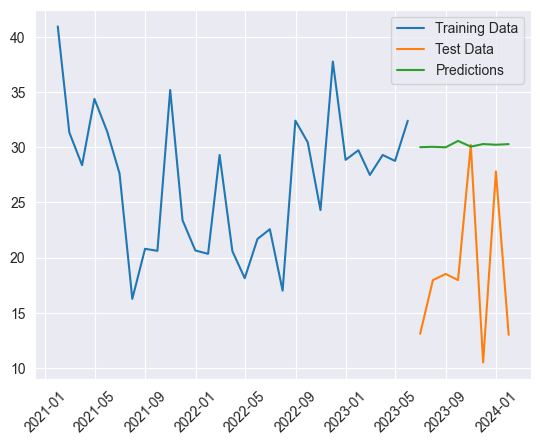

Mean Squared Error: 177.1480713436416


In [34]:
from statsmodels.tsa.arima.model import ARIMA
y = monthly_resampled_data_mean['Likes']

# Splitting the time series into training and test sets
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

# Creating and training the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Model parameters are just examples, can be adjusted based on needs
fit_model = model.fit()

# Making predictions on the test set
y_pred = fit_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Visualizing the actual and predicted values
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(y_pred, label='Predictions')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Evaluating the model performance
mse = mean_squared_error(test, y_pred)
print(f'Mean Squared Error: {mse}')

Lastly, we used ARIMA time series model to analyze likes trend. It seems, we are so bad at predicting with this amount of data :)